In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow.keras.backend as K
import sys
import datetime
from tensorflow.python.client import device_lib

from sificc_lib import AI, Utils_new, Event_new, Simulation_new, root_files, DataModel_new
np.set_printoptions(precision=2, linewidth=85, suppress=True)

%matplotlib inline

In [2]:
# Check used versions
now = datetime.datetime.now()
print("Date-time           ", now)
print("Tf version:         ", keras.__version__)
print("Numpy version:      ", np.__version__)
print("Python              ", sys.executable)
print("Python version      ", sys.version)
print("GPU devices:        ", device_lib.list_local_devices())

Date-time            2021-08-06 10:35:53.763717
Tf version:          2.3.0-tf
Numpy version:       1.19.1
Python               /net/software_g4rt/anaconda3/envs/condaenv-sificcnn/bin/python
Python version       3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]
GPU devices:         [name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12287560726891856743
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 185429573040166024
physical_device_desc: "device: XLA_CPU device"
]


In [3]:
# model name
model_name = 'model-2b-lsr-new-real-pos'

shuffle_clusters = False

# load the training data
data = DataModel_new('data-new-complete-realpos.npz', 
                 batch_size = 128, validation_percent = .05, test_percent = .1)

# append an extra dimention to the features since we are using convolutional layers
data.append_dim = True

# create an AI instance
ai = AI(data, model_name)

ai.weight_type = 2
ai.weight_pos_x = 2.5
ai.weight_pos_y = 1
ai.weight_pos_z = 2
ai.weight_energy = 1.5
ai.weight_e_cluster = 1
ai.weight_p_cluster = 1

# randomly shuffle the training data
#np.random.seed(888)
#ai.data.shuffle(only_train=False)

# shuffle the clusters within each event
if shuffle_clusters:
    ai.data.shuffle_training_clusters()

In [4]:
# define and create the neural network architecture
ai.create_model(conv_layers=[128, 64], classifier_layers=[32], type_layers=[8], 
                pos_layers=[64,32], energy_layers=[32, 16], base_l2=.0001, limbs_l2=.0001)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, 72, 1)]      0                                            
__________________________________________________________________________________________________
conv_1 (Conv1D)                 (None, 8, 128)       1280        inputs[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv1D)                 (None, 8, 64)        8256        conv_1[0][0]                     
__________________________________________________________________________________________________
flatting (Flatten)              (None, 512)          0           conv_2[0][0]                     
______________________________________________________________________________________________

In [5]:
# compile the ai
ai.compile_model(learning_rate=0.0003)

# define the learning rate scheduler for the training phase
def lr_scheduler(epoch):
    if epoch < 90:
        return .0003
    elif epoch < 160:
        return .0001
    elif epoch < 180:
        return .00003
    elif epoch < 190:
        return .00001
    else:
        return .000003
l_callbacks = [
    keras.callbacks.LearningRateScheduler(lr_scheduler),
]

In [6]:
#LOADING after training
#ai.load(model_name, optimizer=False)
#ai.compile_model()

In [7]:
#TRAINING

In [8]:
%%time
# start the training
#ai.train(epochs=200, shuffle=True, shuffle_clusters=shuffle_clusters, verbose=0, callbacks = l_callbacks)

# evaluate the AI on the training set
#ai.model.evaluate(ai.data.train_x, ai.data.train_y, verbose=1)
print()

17876/17876 [==============================] - 30s 2ms/step - loss: 2.3498 - e_cluster_loss: 0.0136 - p_cluster_loss: 0.0477 - type_loss: 0.2821 - pos_x_loss: 0.0283 - pos_y_loss: 0.7868 - pos_z_loss: 0.0187 - energy_loss: 0.5052 - e_cluster__cluster_accuracy: 0.9661 - p_cluster__cluster_accuracy: 0.8679 - type__type_accuracy: 0.8732 - type__type_tp_rate: 0.4580

CPU times: user 1d 11h 5min 17s, sys: 7h 19min 16s, total: 1d 18h 24min 33s
Wall time: 1d 10h 45min 25s


In [6]:
ai.load(model_name, optimizer=False)

In [6]:
ai.evaluate() # 2*5mm in y direction

AI model
  Loss:        2.41957
    -Type:         0.28580 *  2.00 = 0.57159
    -Pos X:        0.02618 *  2.50 = 0.06545
    -Pos Y:        0.78712 *  1.00 = 0.78712
    -Pos Z:        0.01995 *  2.00 = 0.03989
    -Energy:       0.54330 *  1.50 = 0.81494
    -Cls e:        0.01706 *  1.00 = 0.01706
    -Cls p:        0.05195 *  1.00 = 0.05195
  Accuracy:    0.87240
    -TP rate:      0.44324
    -Cls e rate:   0.95631
    -Cls p rate:   0.85466
  Efficiency:  0.04090
  Purity:      0.05288
  Euc mean:   11.84125
  Euc std:    18.12689

Reco
  Accuracy:    0.69095
    -TP rate:      0.38116
  Efficiency:  0.03109
  Purity:      0.01627
  Euc mean:   20.99790
  Euc std:    44.40953


In [6]:
ai.evaluate() # 2*10mm in y direction

AI model
  Loss:        2.41957
    -Type:         0.28580 *  2.00 = 0.57159
    -Pos X:        0.02618 *  2.50 = 0.06545
    -Pos Y:        0.78712 *  1.00 = 0.78712
    -Pos Z:        0.01995 *  2.00 = 0.03989
    -Energy:       0.54330 *  1.50 = 0.81494
    -Cls e:        0.01706 *  1.00 = 0.01706
    -Cls p:        0.05195 *  1.00 = 0.05195
  Accuracy:    0.87240
    -TP rate:      0.44324
    -Cls e rate:   0.95631
    -Cls p rate:   0.85466
  Efficiency:  0.07634
  Purity:      0.09869
  Euc mean:   11.84125
  Euc std:    18.12689

Reco
  Accuracy:    0.69095
    -TP rate:      0.38116
  Efficiency:  0.05836
  Purity:      0.03055
  Euc mean:   20.99790
  Euc std:    44.40953


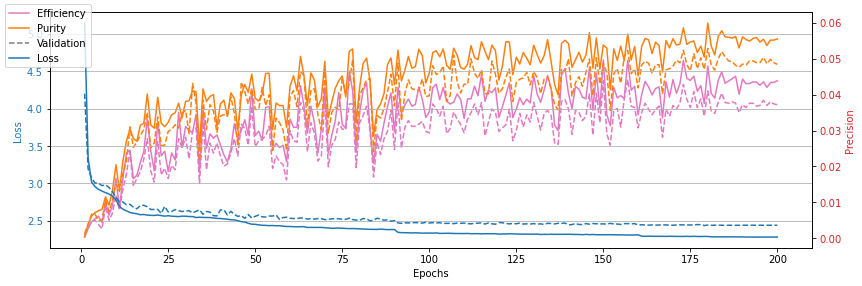

In [7]:
# plot the training loss
ai.plot_training_loss(smooth=False)

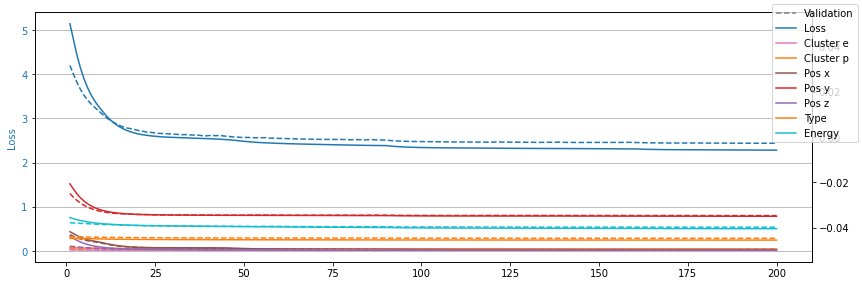

In [8]:
ai.plot_training_loss(mode = 'loss')

 0.07634 Total efficiency
 0.09869 Total purity
 67296 All valid events
   739 Correctly recon./ident. events
  9681 All true Compton events
  7488 NN pred Compton events
  4291 NN type-matched events
    3552 Type matched, pos energy mismatched 
    2890 Type and pos matched 
    1056 Type and energy matched 


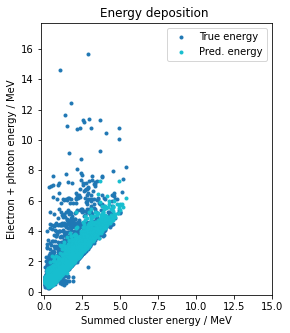

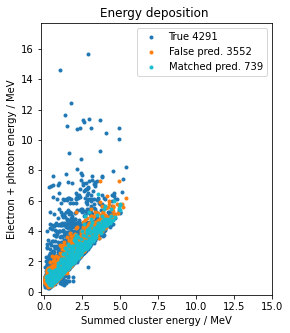

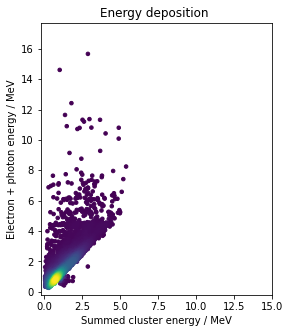

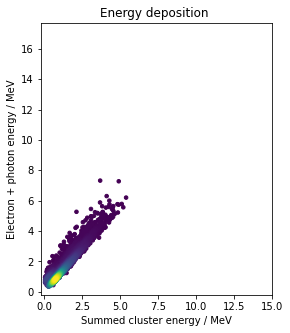

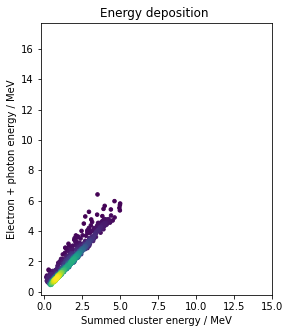

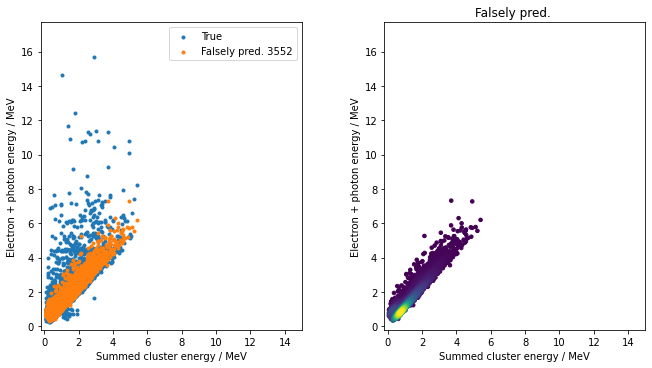

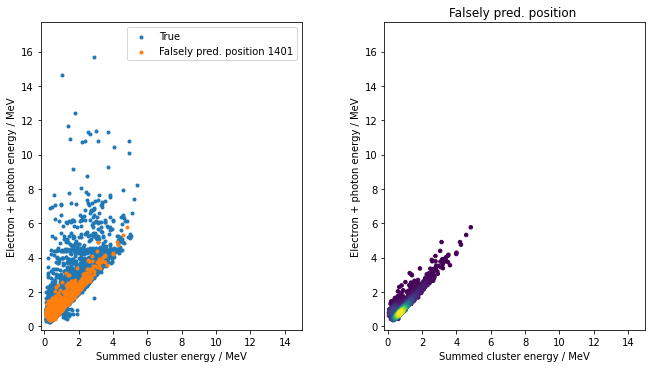

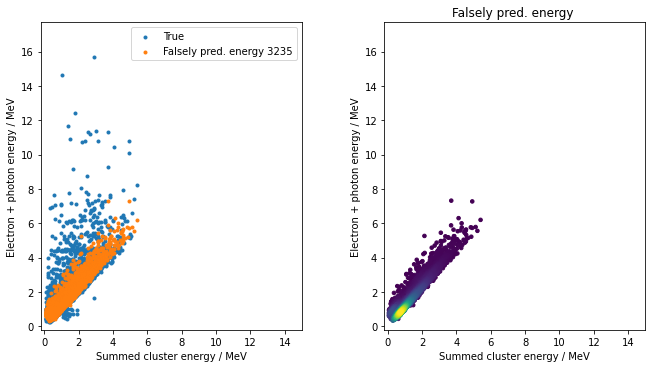

 Prediction of x positions 
4291.00000 Matched type number 
2890.00000 Matched position number 
2890.00000 Matched position number and matched type
 0.67350 Matched position from matched type 
    4291 Pred e in scatterer 
       0 Pred p in scatterer 
    4258 Matched e in scat 
       0 Matched p in scat 
    4258 True e in scatterer 
      33 True p in scatterer 
      33 True e in abs 
    4258 True p in abs 
       0 Pred e in abs 
    4264 Pred p in abs 
       0 Matched e in abs 
    4231 Matched p in abs 



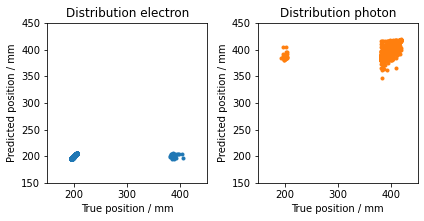

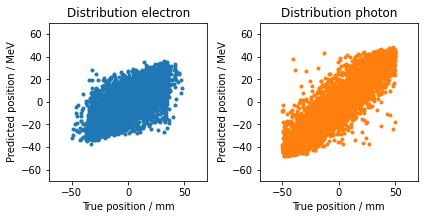

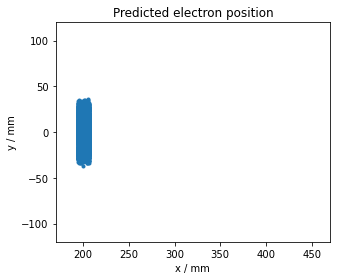

In [11]:
#ai.savefigpath = '/home/home2/institut_3b/profe/Data/SiFiCCNN/NewSim/model-2b-lsr/EnergyDeposition/'
ai.events_prediction_analysis('all-events', save = False)

In [15]:
#ai.events_prediction_analysis('cluster-numbers')

In [16]:
#ai.events_prediction_analysis('cluster-distribution')

In [17]:
#ai.events_prediction_analysis('e-scatterer')

In [18]:
# save the trained model
#ai.save(file_name = model_name)